# 01: Exploratory Data Analysis (EDA) — NYC Airbnb Dataset

**Objective:** Understand the structure, distributions, and patterns in the NYC Airbnb market.

**Deliverables:**
- Cleaned datasets saved to `data/processed/`
- Key insights on pricing, neighborhoods, seasonality, and occupancy
- Data quality assessment


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

# Plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Paths
PROJECT_ROOT = Path("..").resolve().parent if (Path.cwd().name == "notebooks") else Path(".")
DATA_RAW = PROJECT_ROOT / "data" / "raw"
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

PROJECT_ROOT, DATA_RAW, DATA_PROCESSED


(PosixPath('.'), PosixPath('data/raw'), PosixPath('data/processed'))

In [3]:
# Load raw data
listings_path = DATA_RAW / "listings.csv"
calendar_path = DATA_RAW / "calendar.csv"

print("Listings path:", listings_path)
print("Calendar path:", calendar_path)

listings = pd.read_csv(listings_path)
calendar = pd.read_csv(calendar_path)

print(f"Listings shape: {listings.shape}")
print(f"Calendar shape: {calendar.shape}")
listings.head()


Listings path: data/raw/listings.csv
Calendar path: data/raw/calendar.csv
Listings shape: (36261, 85)
Calendar shape: (13235283, 7)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20251204025441,2025-12-06,previous scrape,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,...,5.00,4.75,4.88,NaN,f,7,1,6,0,0.07
1,2595,https://www.airbnb.com/rooms/2595,20251204025441,2025-12-05,city scrape,Skylit Studio Oasis | Midtown Manhattan Sanctuary,Prime Midtown | Spacious 500 Sq Ft | Pyramid S...,Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.24
2,6848,https://www.airbnb.com/rooms/6848,20251204025441,2025-12-04,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.69,4.59,NaN,f,1,1,0,0,0.98
3,6872,https://www.airbnb.com/rooms/6872,20251204025441,2025-12-05,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.05
4,6990,https://www.airbnb.com/rooms/6990,20251204025441,2025-12-05,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/45fb4ec7-6856...,16800,...,4.94,4.85,4.83,NaN,f,1,0,1,0,1.27


In [5]:
# Inspect raw price column
print(listings["price"].head(10))
print("dtype:", listings["price"].dtype)

# Clean price: strip '$' and ',' and convert to float
listings_clean = listings.copy()
listings_clean["price"] = (
    listings_clean["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

print("\nPrice stats after cleaning:")
print(listings_clean["price"].describe())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: price, dtype: float64
dtype: float64

Price stats after cleaning:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64


In [6]:
# Work on a copy of calendar data
calendar_clean = calendar.copy()

# 1. Convert date to datetime
calendar_clean["date"] = pd.to_datetime(calendar_clean["date"])

# 2. Clean price: some rows may have '$' and ','; some are already numbers or NaN
calendar_clean["price"] = (
    calendar_clean["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Coerce to numeric, turning non-numeric into NaN
calendar_clean["price"] = pd.to_numeric(calendar_clean["price"], errors="coerce")

print("Calendar price stats (all rows):")
print(calendar_clean["price"].describe())


Calendar price stats (all rows):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64


In [7]:
# Use Kaggle NYC Airbnb dataset as main source
kaggle_path = DATA_RAW / "AB_NYC_2019.csv"  # change name here if your file is different

print("Kaggle dataset path:", kaggle_path)

nyc = pd.read_csv(kaggle_path)

print(f"NYC dataset shape: {nyc.shape}")
nyc.head()


Kaggle dataset path: data/raw/AB_NYC_2019.csv
NYC dataset shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Basic info
nyc.info()

print("\nPrice summary (raw):")
print(nyc["price"].describe())

print("\nUnique neighbourhood_groups:", nyc["neighbourhood_group"].unique())
print("Unique room_types:", nyc["room_type"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Filter to a realistic nightly price range
nyc_clean = nyc.copy()
nyc_clean = nyc_clean[(nyc_clean["price"] >= 20) & (nyc_clean["price"] <= 1000)]

print(f"Rows before filter: {len(nyc)}")
print(f"Rows after  filter: {len(nyc_clean)}")

print("\nPrice summary after filtering:")
print(nyc_clean["price"].describe())


Rows before filter: 48895
Rows after  filter: 48602

Price summary after filtering:
count    48602.000000
mean       141.425250
std        116.720549
min         20.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64


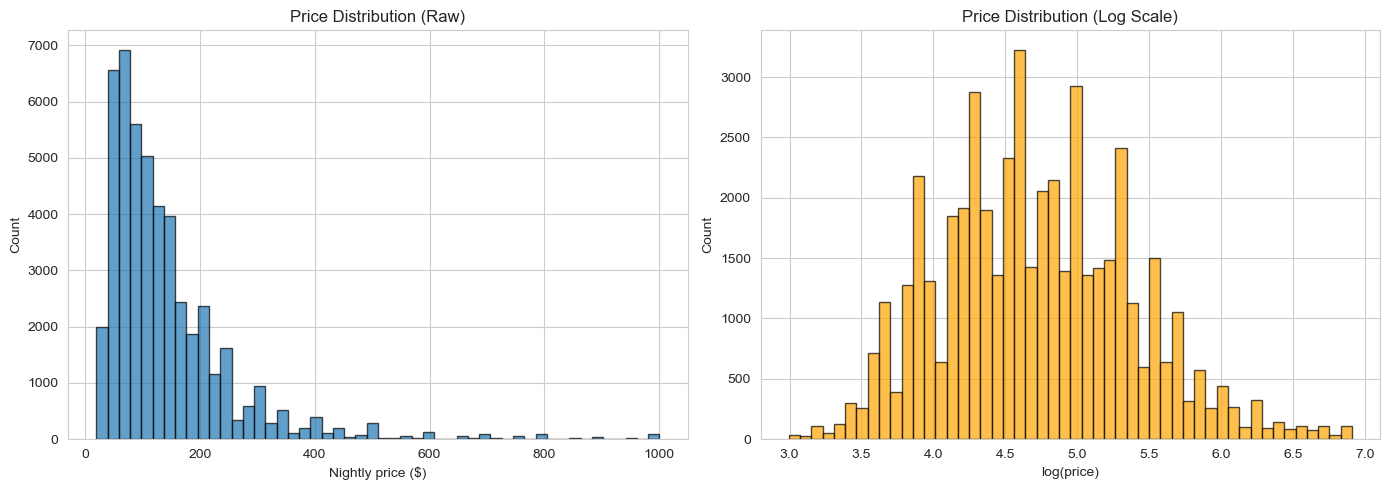

In [10]:
# Price distribution: raw vs log
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw price
axes[0].hist(nyc_clean["price"], bins=50, edgecolor="black", alpha=0.7)
axes[0].set_title("Price Distribution (Raw)")
axes[0].set_xlabel("Nightly price ($)")
axes[0].set_ylabel("Count")

# Log price
axes[1].hist(np.log(nyc_clean["price"]), bins=50, edgecolor="black", alpha=0.7, color="orange")
axes[1].set_title("Price Distribution (Log Scale)")
axes[1].set_xlabel("log(price)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [11]:
# Average price by borough (neighbourhood_group)
borough_stats = (
    nyc_clean
    .groupby("neighbourhood_group")["price"]
    .agg(["count", "mean", "median"])
    .sort_values("mean", ascending=False)
    .round(2)
)

print(borough_stats)


                     count    mean  median
neighbourhood_group                       
Manhattan            21473  179.06   149.0
Brooklyn             20026  117.94    90.0
Staten Island          370   98.82    75.0
Queens                5645   95.17    75.0
Bronx                 1088   85.43    65.0


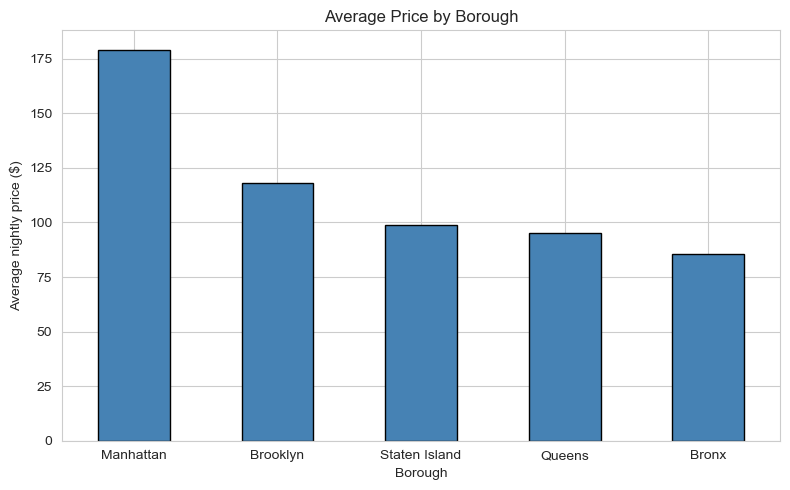

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
borough_stats["mean"].plot(kind="bar", ax=ax, color="steelblue", edgecolor="black")
ax.set_title("Average Price by Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Average nightly price ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [13]:
# Price by room type
room_stats = (
    nyc_clean
    .groupby("room_type")["price"]
    .agg(["count", "mean", "median"])
    .sort_values("mean", ascending=False)
    .round(2)
)

print(room_stats)


                 count    mean  median
room_type                             
Entire home/apt  25200  194.73   160.0
Private room     22260   84.83    70.0
Shared room       1142   68.38    45.0


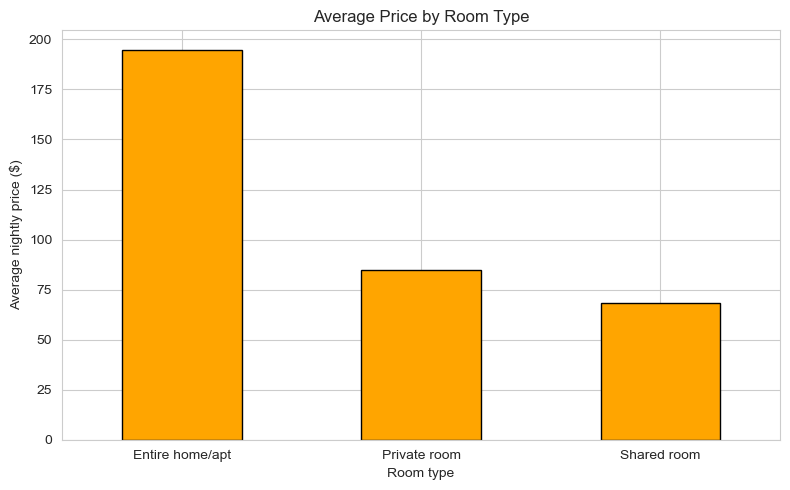

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
room_stats["mean"].plot(kind="bar", ax=ax, color="orange", edgecolor="black")
ax.set_title("Average Price by Room Type")
ax.set_xlabel("Room type")
ax.set_ylabel("Average nightly price ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
# Save cleaned NYC dataset for later steps
from pathlib import Path

DATA_PROCESSED = (Path("..") / "data" / "processed") if Path.cwd().name == "notebooks" else Path("data/processed")
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

output_path = DATA_PROCESSED / "nyc_clean.parquet"
nyc_clean.to_parquet(output_path, index=False)

print(f"Saved cleaned data to: {output_path}")
print(f"Rows: {len(nyc_clean)}, Columns: {nyc_clean.shape[1]}")


Saved cleaned data to: data/processed/nyc_clean.parquet
Rows: 48602, Columns: 16
